In [1]:
# Import libraries
import pandas as pd

# Download NLTK corpus (first time only)
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [2]:
# Download all NLTK resources (first time only)
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/vidyutrajagopal/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/vidyutrajagopal/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/vidyutrajagopal/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/vidyutrajagopal/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/vidyutrajagopal/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[n

True

In [3]:
# Load the Amazon review dataset
df = pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv')

# Display the first few rows of the dataset
df.head()


,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [5]:
# create preprocess_text function
def preprocess_text(text):
    # Tokenize the text - Splitting the text into individual words and punctuation
    tokens = word_tokenize(text.lower())

    # Remove stop words (and/or/if)
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens (removes -ing, -ed, etc)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

df['reviewText'] = df['reviewText'].apply(preprocess_text)
df

,reviewText,Positive
0,one best apps acording bunch people agree bomb...,1
1,pretty good version game free . lot different ...,1
2,really cool game . bunch level find golden egg...,1
3,"silly game frustrating , lot fun definitely re...",1
4,terrific game pad . hr fun . grandkids love . ...,1
...,...,...
19995,app fricken stupid.it froze kindle wont allow ...,0
19996,please add ! ! ! ! ! need neighbor ! ginger101...,1
19997,love ! game . awesome . wish free stuff house ...,1
19998,love love love app side fashion story fight wo...,1


In [6]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment




# apply get_sentiment function

df['sentiment'] = df['reviewText'].apply(get_sentiment)

,reviewText,Positive,sentiment
0,one best apps acording bunch people agree bomb...,1,1
1,pretty good version game free . lot different ...,1,1
2,really cool game . bunch level find golden egg...,1,1
3,"silly game frustrating , lot fun definitely re...",1,1
4,terrific game pad . hr fun . grandkids love . ...,1,1
...,...,...,...
19995,app fricken stupid.it froze kindle wont allow ...,0,0
19996,please add ! ! ! ! ! need neighbor ! ginger101...,1,1
19997,love ! game . awesome . wish free stuff house ...,1,1
19998,love love love app side fashion story fight wo...,1,1


Confusion Matrix:
[[ 2387  2380]
 [ 1457 13776]]


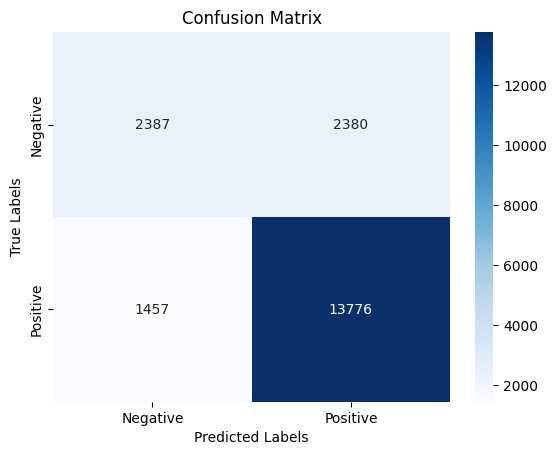

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df['Positive'] = df['Positive'].map({0: 'Negative', 1: 'Positive'})

# Compute the confusion matrix
cm = confusion_matrix(df['Positive'], df['sentiment'], labels=['Negative', 'Positive'])

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix using seaborn heatmap for better visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()